# Arbeiten mit Text mit NLTK, Textblob und Spacy

Wenn ihr vorher Zeit habt installiert schon mal folgende Pakete:
- ```!pip3 install spacy```
- ```pip install -U textblob```
- ```pip install -U textblob-de```

In [2]:
#!pip3 install spacy
#!pip3 install -U textblob
#!pip3 install -U textblob-de

## Agenda

- Tokenization
- Stemming
- Lemmatization
    - Pattern
    - TextBlob
- POS Tagging
    - Pattern
    - TextBlob
- Stop Word removal
- Wordle 2.0

## Tokenizer
- Wie splittet man einfach einen Satz in Wörter auf?
- https://www.admin.ch/opc/de/classified-compilation/19995395/index.html#a8

In [3]:
import nltk
from nltk.tokenize import word_tokenize

In [4]:
verfassung = '''
Im Namen Gottes des Allmächtigen!

Das Schweizervolk und die Kantone,"""

in der Verantwortung gegenüber der Schöpfung,

im Bestreben, den Bund zu erneuern, um Freiheit und Demokratie, Unabhängigkeit und Frieden in Solidarität und Offenheit gegenüber der Welt zu stärken,

im Willen, in gegenseitiger Rücksichtnahme und Achtung ihre Vielfalt in der Einheit zu leben,

im Bewusstsein der gemeinsamen Errungenschaften und der Verantwortung gegenüber den künftigen Generationen,

gewiss, dass frei nur ist, wer seine Freiheit gebraucht, und dass die Stärke des Volkes sich misst am Wohl der Schwachen,

geben sich folgende Verfassung:
'''

In [5]:
#verfassung = verfassung.decode('utf-8')
verfassung

'\nIm Namen Gottes des Allmächtigen!\n\nDas Schweizervolk und die Kantone,"""\n\nin der Verantwortung gegenüber der Schöpfung,\n\nim Bestreben, den Bund zu erneuern, um Freiheit und Demokratie, Unabhängigkeit und Frieden in Solidarität und Offenheit gegenüber der Welt zu stärken,\n\nim Willen, in gegenseitiger Rücksichtnahme und Achtung ihre Vielfalt in der Einheit zu leben,\n\nim Bewusstsein der gemeinsamen Errungenschaften und der Verantwortung gegenüber den künftigen Generationen,\n\ngewiss, dass frei nur ist, wer seine Freiheit gebraucht, und dass die Stärke des Volkes sich misst am Wohl der Schwachen,\n\ngeben sich folgende Verfassung:\n'

### In einzelne Wörter + Zeichen

In [6]:
tokens = nltk.word_tokenize(verfassung)
tokens[0:20]

['Im',
 'Namen',
 'Gottes',
 'des',
 'Allmächtigen',
 '!',
 'Das',
 'Schweizervolk',
 'und',
 'die',
 'Kantone',
 ',',
 "''",
 "''",
 "''",
 'in',
 'der',
 'Verantwortung',
 'gegenüber',
 'der']

### In Wörter

In [7]:
from nltk.tokenize import word_tokenize
words = word_tokenize(verfassung)
#words

In [18]:
"#".isalpha()

False

In [19]:
from nltk.tokenize import word_tokenize
words = word_tokenize(verfassung)
words=[word.lower() for word in words if word.isalpha()]
words[0:20]

['im',
 'namen',
 'gottes',
 'des',
 'allmächtigen',
 'das',
 'schweizervolk',
 'und',
 'die',
 'kantone',
 'in',
 'der',
 'verantwortung',
 'gegenüber',
 'der',
 'schöpfung',
 'im',
 'bestreben',
 'den',
 'bund']

In [25]:
"9".isalnum()

True

### Hier noch ein paar praktische Python funktionen wie isalpha

|  s.startswith(t) | test if s starts with t |
|  ------ | ------ |
|  s.endswith(t) | test if s ends with t |
|  t in s | test if t is a substring of s |
|  s.islower() | test if s contains cased characters and all are lowercase |
|  s.isupper() | test if s contains cased characters and all are uppercase |
|  s.isalpha() | test if s is non-empty and all characters in s are alphabetic |
|  s.isalnum() | test if s is non-empty and all characters in s are alphanumeric |
|  s.isdigit() | test if s is non-empty and all characters in s are digits |
|  s.istitle() | test if s contains cased characters and is titlecased (i.e. all words in s have initial capitals) |

### In Sätze

In [30]:
from nltk.tokenize import sent_tokenize
sentences = sent_tokenize(verfassung)
sentences[0]

'\nIm Namen Gottes des Allmächtigen!'

## Stemming
- d.h. das überführen von Wörtern in den gleichen Stamm. 
- Übliche Probleme die Sprache so mit sich bringt:
    - Deklination: gehe, gehst, gehen, geht, ... es handelt sich ja quasi das gleiche Wort - uns sind diese Deklinationen egal. 
    - Plural, Groß/Kleinschreibung: katze, katzen, Katze ... es handelt sich auch um das gleiche Wort. 
    - ...

In [32]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

### Porter stemmer
- geht ganz ok für Englisch
- https://de.wikipedia.org/wiki/Porter-Stemmer-Algorithmus

In [33]:
from nltk.corpus import udhr
engl_words = udhr.words("English-Latin1")
engl_words[0:10]

['Universal',
 'Declaration',
 'of',
 'Human',
 'Rights',
 'Preamble',
 'Whereas',
 'recognition',
 'of',
 'the']

In [36]:
porter.stem("declaration")

'declar'

In [35]:
porter.stem("declaring")

'declar'

In [34]:
porter.stem("declare")

'declar'

In [37]:
[porter.stem(w) for w in engl_words][0:10]

['univers',
 'declar',
 'of',
 'human',
 'right',
 'preambl',
 'wherea',
 'recognit',
 'of',
 'the']

### Lancaster Stemmer
- kommt zu leicht anderen "stämmen"
- funktioniert nicht so gut für Deutsch

In [38]:
[lancaster.stem(w) for w in engl_words][0:10]

['univers',
 'decl',
 'of',
 'hum',
 'right',
 'preambl',
 'wherea',
 'recognit',
 'of',
 'the']

### Snowball stemmer
- Geht okish für deusch
- http://snowball.tartarus.org/algorithms/german/stemmer.html

In [39]:
snowball = nltk.stem.snowball.GermanStemmer()

In [43]:
[snowball.stem(w) for w in words][0:10]

['im',
 'nam',
 'gott',
 'des',
 'allmacht',
 'das',
 'schweizervolk',
 'und',
 'die',
 'kanton']

In [42]:
[lancaster.stem(w) for w in words][0:10]

['im',
 'nam',
 'got',
 'des',
 'allmächtig',
 'das',
 'schweizervolk',
 'und',
 'die',
 'kanton']

## Lemmatizer
- Zurückführen des Wortes zu "Wörterbuchdefinitionen"

In [51]:
text = "Women in technologies areas are amazing at coding. Especially one woman is great, her name is Ursula Burns."
words = word_tokenize(text)
words_engl =[word.lower() for word in words if word.isalpha()]
(" ").join(words_engl[0:20])

'women in technologies areas are amazing at coding especially one woman is great her name is ursula burns'

In [50]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemma = nltk.WordNetLemmatizer() 
lemmas = [lemma.lemmatize(i) for i in words_engl]
(" ").join(lemmas[0:20])

[nltk_data] Downloading package wordnet to /Users/plotti/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'woman in technology area have been amazing at coding especially one woman is great her name is ursula burn'

### Lematizer Deutsch NLTK
- Geht leider nicht für deusch :( in nltk

In [52]:
party_text = '''
Kurz vor 22.00 Uhr sind Polizisten der Stadtpolizei in alle Richtungen aber vor allem in Richtung Kreis 9 ausgerückt. Grund war eine Meldung zu einer privaten Party an der Aargauerstrasse, die angeblich ausser Kontrolle geraten sei. 
'''
#party_text = party_text.decode("UTF-8")
words = word_tokenize(party_text)
words_german =[word.lower() for word in words if word.isalpha()]
(" ").join(words_german[0:20])

'kurz vor uhr sind polizisten der stadtpolizei in alle richtungen aber vor allem in richtung kreis ausgerückt grund war eine'

In [53]:
lemma = nltk.WordNetLemmatizer() 
lemmas = [lemma.lemmatize(i) for i in words_german]
(" ").join(lemmas[0:20])

'kurz vor uhr sind polizisten der stadtpolizei in alle richtungen aber vor allem in richtung kreis ausgerückt grund war eine'

## Lemmatizer in Textblob
 - https://textblob.readthedocs.io/en/dev/quickstart.html
 - ```pip install -U textblob```
 - ```pip install -U textblob-de```
 - https://github.com/markuskiller/textblob-de

In [9]:
#!pip2.7 install -U textblob --user
#!pip2.7 install -U --upgrade textblob-de --user

In [55]:
from textblob_de import TextBlobDE
from textblob_de import PatternParser

party_text = '''Kurz vor 22.00 Uhr sind Polizisten der Stadtpolizei in alle Richtungen aber vor allem in Richtung Kreis 9 ausgerückt. Grund war eine Meldung zu einer privaten Party an der Aargauerstrasse, die angeblich ausser Kontrolle geraten sei. 
'''
blob = TextBlobDE(party_text, parser=PatternParser(pprint=False, lemmata=True))
blob.parse()
list(blob.words.lemmatize())[0:20]

['kurz',
 'vor',
 '22.00',
 'Uhr',
 'sein',
 'Polizist',
 'der',
 'Stadtpolizei',
 'in',
 'all',
 'Richtungen',
 'aber',
 'vor',
 'all',
 'in',
 'Richtung',
 'Kreis',
 '9',
 'ausgerückt',
 'Grund']

## Spacy German Lemmatizer 

- Spacy ist ein machine learning natural language processing tool. 
- Aufgrund des Deep Learning Ansatzes ist es am weitesten von allen derzeitigen Tools fortgeschritten. 
- Allerdings erschliessen sich viele Funktionen für Laien nicht sofort. Wir werden uns spacy morgen im detail anschauen. 

- ```pip install --user spacy```
- Deutsche Modelle runterladen:```pip install https://github.com/explosion/spacy-models/releases/download/de_core_news_sm-2.0.0/de_core_news_sm-2.0.0.tar.gz```
- oder ```python -m spacy download de_core_news_sm```

In [37]:
!pip3 install spacy

In [ ]:
#!pip install treetaggerwrapper

In [57]:
#!python -m spacy download de_core_news_sm

In [59]:
import spacy
nlp = spacy.load("de_core_news_sm")
doc = nlp('''Kurz vor 22.00 Uhr sind Polizisten der Stadtpolizei in alle Richtungen aber vor allem in Richtung Kreis 9 ausgerückt. Grund war eine Meldung zu einer privaten Party an der Aargauerstrasse, die angeblich ausser Kontrolle geraten sei. ''')
#doc = nlp('Die Schweizer Wirtschaft dürfte 2020 ein Wachstum von zwei Prozent verzeichnen, sagen die Datenschutzbeauftragten. '          'Dasselbe gilt für Versicherungsprämien und Aufwände der Krankenkassen im Allgemeinen. Auch die Bäume haben ein Problem.')
lemmas = [token.lemma_ for token in doc]
print(lemmas)

['kurz', 'vor', '22.00', 'Uhr', 'sein', 'Polizist', 'der', 'Stadtpolizei', 'in', 'aller', 'Richtung', 'aber', 'vor', 'alle', 'in', 'Richtung', 'Kreis', '9', 'ausgerücken', '--', 'Grund', 'sein', 'ein', 'Meldung', 'zu', 'ein', 'privat', 'Party', 'an', 'der', 'Aargauerstrasse', '--', 'der', 'angeblich', 'auss', 'Kontrolle', 'geraten', 'sein', '--']


## POS Tagging (Part of Speech Tagging)
- Ich bin nur interessiert an Substantiven oder Adjektiven oder Verben. 
- Wie kann ich nur diese filtern? 
- Funktioniert für Deutsch nicht auf Anhieb in NLTK :(
- aber gut in spacy und textblob

## Übersicht
https://www.clips.uantwerpen.be/pages/mbsp-tags

|  Tag | Description | Example |
|  ------ | ------ | ------ |
|  **CC** | conjunction, coordinating | and, or, but |
|  **CD** | cardinal number | five, three, 13% |
|  **DT** | determiner | the, a, these |
|  **EX** | existential there | there were six boys |
|  **FW** | foreign word | mais |
|  **IN** | conjunction, subordinating or preposition | of, on, before, unless |
|  **JJ** | adjective | nice, easy |
|  **JJR** | adjective, comparative | nicer, easier |
|  **JJS** | adjective, superlative | nicest, easiest |
|  **LS** | list item marker |  |
|  **MD** | verb, modal auxillary | may, should |
|  **NN** | noun, singular or mass | tiger, chair, laughter |
|  **NNS** | noun, plural | tigers, chairs, insects |
|  **NNP** | noun, proper singular | Germany, God, Alice |
|  **NNPS** | noun, proper plural | we met two Christmases ago |
|  **PDT** | predeterminer | both his children |
|  **POS** | possessive ending | s |
|  **PRP** | pronoun, personal | me, you, it |
|  **PRP** | pronoun, possessive | my, your, our |
|  **RB** | adverb | extremely, loudly, hard |
|  **RBR** | adverb, comparative | better |
|  **RBS** | adverb, superlative | best |
|  **RP** | adverb, particle | about, off, up |
|  **SYM** | symbol | % |
|  **TO** | infinitival to | what to do? |
|  **UH** | interjection | oh, oops, gosh |
|  **VB** | verb, base form | think |
|  **VBZ** | verb, 3rd person singular present | she thinks |
|  **VBP** | verb, non-3rd person singular present | I think |
|  **VBD** | verb, past tense | they thought |
|  **VBN** | verb, past participle | a sunken ship |
|  **VBG** | verb, gerund or present participle | thinking is fun |
|  **WDT** | wh-determiner | which, whatever, whichever |
|  **WP** | wh-pronoun, personal | what, who, whom |
|  **WP** | wh-pronoun, possessive | whose, whosever |
|  **WRB** | wh-adverb | where, when |
|  **.** | punctuation mark, sentence closer | .;?* |
|  **,** | punctuation mark, comma | , |
|  **:** | punctuation mark, colon | : |
|  **(** | contextual separator, left paren | ( |
|  **)** | contextual separator, right paren | ) |

### POS Tags in spacy

In [60]:
party_text = '''Kurz vor 22.00 Uhr sind Polizisten der Stadtpolizei in alle Richtungen aber vor allem in Richtung Kreis 9 ausgerückt. Grund war eine Meldung zu einer privaten Party an der Aargauerstrasse, die angeblich ausser Kontrolle geraten sei. 
'''
party_text

'Kurz vor 22.00 Uhr sind Polizisten der Stadtpolizei in alle Richtungen aber vor allem in Richtung Kreis 9 ausgerückt. Grund war eine Meldung zu einer privaten Party an der Aargauerstrasse, die angeblich ausser Kontrolle geraten sei. \n'

In [61]:
verben = []
substantive = []
adjektive = []

import spacy
nlp = spacy.load("de_core_news_sm")
doc = nlp(party_text)

for token in doc:
    if "VERB" in token.pos_:
        verben.append(token)
    if "NOUN" in token.pos_:
        substantive.append(token)
    if "ADJ" in token.pos_:
        adjektive.append(token)

In [62]:
verben

[ausgerückt, geraten]

In [63]:
substantive

[Uhr,
 Polizisten,
 Stadtpolizei,
 Richtungen,
 Richtung,
 Kreis,
 Grund,
 Meldung,
 Party,
 Aargauerstrasse,
 Kontrolle]

In [64]:
adjektive

[privaten, ausser]

### POS tags in textblob

In [65]:
substantive = []
adjektive = []
verben = []
blob = TextBlobDE(party_text, parser=PatternParser(pprint=False, lemmata=True))
for word in blob.tags:
    if "NN" in word[1]:
        substantive.append(word[0])
    if "V" in word[1]:
        verben.append(word[0])
    if "JJ" in word[1]:
        adjektive.append(word[0])

In [66]:
substantive

['Uhr',
 'Polizisten',
 'Stadtpolizei',
 'Richtungen',
 'Richtung',
 'Kreis',
 'ausgerückt',
 'Grund',
 'Meldung',
 'Party',
 'Aargauerstrasse',
 'Kontrolle']

In [67]:
adjektive

['Kurz', 'alle', 'privaten', 'angeblich']

In [68]:
verben

['sind', 'war', 'geraten', 'sei']

# Stop word removal

In [69]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/plotti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Englisch

In [72]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [74]:
words_engl = ["the", "big", "tree", "and", "the", "duck"]
filtered_words = [word for word in words_engl if word not in stopwords.words('english')]
filtered_words

['big', 'tree', 'duck']

### Deutsch

In [77]:
mylist = stopwords.words('german')
#mylist

### Eigene Stopwords hinzufügen oder entfernen

In [81]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
mylist = stopwords.words('german')
mylist.append("plotti")
mylist

['aber',
 'alle',
 'allem',
 'allen',
 'aller',
 'alles',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer',
 'anderes',
 'anderm',
 'andern',
 'anderr',
 'anders',
 'auch',
 'auf',
 'aus',
 'bei',
 'bin',
 'bis',
 'bist',
 'da',
 'damit',
 'dann',
 'der',
 'den',
 'des',
 'dem',
 'die',
 'das',
 'dass',
 'daß',
 'derselbe',
 'derselben',
 'denselben',
 'desselben',
 'demselben',
 'dieselbe',
 'dieselben',
 'dasselbe',
 'dazu',
 'dein',
 'deine',
 'deinem',
 'deinen',
 'deiner',
 'deines',
 'denn',
 'derer',
 'dessen',
 'dich',
 'dir',
 'du',
 'dies',
 'diese',
 'diesem',
 'diesen',
 'dieser',
 'dieses',
 'doch',
 'dort',
 'durch',
 'ein',
 'eine',
 'einem',
 'einen',
 'einer',
 'eines',
 'einig',
 'einige',
 'einigem',
 'einigen',
 'einiger',
 'einiges',
 'einmal',
 'er',
 'ihn',
 'ihm',
 'es',
 'etwas',
 'euer',
 'eure',
 'eurem',
 'euren',
 'eurer',
 'eures',
 'für',
 'gegen',
 'gewesen',
 'hab',
 'habe',
 'haben',
 'hat',
 'hatte',
 'hatten',
 '

In [48]:
a = ["plotti", "was", "was", "here"]
a.remove("plotti")

In [23]:

my_new_list = list(set(mylist)-set(["ich"]))
#my_new_list

In [25]:
mylist = stopwords.words('german')
mylist.append("Seite")
mylist.append("test")
mylist

['aber',
 'alle',
 'allem',
 'allen',
 'aller',
 'alles',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer',
 'anderes',
 'anderm',
 'andern',
 'anderr',
 'anders',
 'auch',
 'auf',
 'aus',
 'bei',
 'bin',
 'bis',
 'bist',
 'da',
 'damit',
 'dann',
 'der',
 'den',
 'des',
 'dem',
 'die',
 'das',
 'dass',
 'daß',
 'derselbe',
 'derselben',
 'denselben',
 'desselben',
 'demselben',
 'dieselbe',
 'dieselben',
 'dasselbe',
 'dazu',
 'dein',
 'deine',
 'deinem',
 'deinen',
 'deiner',
 'deines',
 'denn',
 'derer',
 'dessen',
 'dich',
 'dir',
 'du',
 'dies',
 'diese',
 'diesem',
 'diesen',
 'dieser',
 'dieses',
 'doch',
 'dort',
 'durch',
 'ein',
 'eine',
 'einem',
 'einen',
 'einer',
 'eines',
 'einig',
 'einige',
 'einigem',
 'einigen',
 'einiger',
 'einiges',
 'einmal',
 'er',
 'ihn',
 'ihm',
 'es',
 'etwas',
 'euer',
 'eure',
 'eurem',
 'euren',
 'eurer',
 'eures',
 'für',
 'gegen',
 'gewesen',
 'hab',
 'habe',
 'haben',
 'hat',
 'hatte',
 'hatten',
 '

In [83]:
words_german = ["ich", "war", "im", "wald", "spazieren", "Seite", "test","plotti"]
filtered_words = [word for word in words_german if word not in mylist]
filtered_words

['wald', 'spazieren', 'Seite', 'test']

# Wordle 2.0

- Tokenization
- Lemmatization

In [84]:
text = (" ").join(udhr.words("German_Deutsch-Latin1"))
#text
# tokenize 
words = word_tokenize(text)
#words
# nur wörter behalten
words_german =[word.lower() for word in words if word.isalpha()]
words_german

['die',
 'allgemeine',
 'erklärung',
 'der',
 'menschenrechte',
 'resolution',
 'a',
 'iii',
 'vom',
 'präambel',
 'da',
 'die',
 'anerkennung',
 'der',
 'angeborenen',
 'würde',
 'und',
 'der',
 'gleichen',
 'und',
 'unveräußerlichen',
 'rechte',
 'aller',
 'mitglieder',
 'der',
 'gemeinschaft',
 'der',
 'menschen',
 'die',
 'grundlage',
 'von',
 'freiheit',
 'gerechtigkeit',
 'und',
 'frieden',
 'in',
 'der',
 'welt',
 'bildet',
 'da',
 'die',
 'nichtanerkennung',
 'und',
 'verachtung',
 'der',
 'menschenrechte',
 'zu',
 'akten',
 'der',
 'barbarei',
 'geführt',
 'haben',
 'die',
 'das',
 'gewissen',
 'der',
 'menschheit',
 'mit',
 'empörung',
 'erfüllen',
 'und',
 'da',
 'verkündet',
 'worden',
 'ist',
 'daß',
 'einer',
 'welt',
 'in',
 'der',
 'die',
 'menschen',
 'rede',
 'und',
 'glaubensfreiheit',
 'und',
 'freiheit',
 'von',
 'furcht',
 'und',
 'not',
 'genießen',
 'das',
 'höchste',
 'streben',
 'des',
 'menschen',
 'gilt',
 'da',
 'es',
 'notwendig',
 'ist',
 'die',
 'mensche

In [85]:
# lemmatize
lemma = nltk.WordNetLemmatizer()
lemmas = [lemma.lemmatize(i) for i in words_german]
clean_blob = lemmas
#" ".join(clean_blob[:30])
clean_blob

['die',
 'allgemeine',
 'erklärung',
 'der',
 'menschenrechte',
 'resolution',
 'a',
 'iii',
 'vom',
 'präambel',
 'da',
 'die',
 'anerkennung',
 'der',
 'angeborenen',
 'würde',
 'und',
 'der',
 'gleichen',
 'und',
 'unveräußerlichen',
 'rechte',
 'aller',
 'mitglieder',
 'der',
 'gemeinschaft',
 'der',
 'menschen',
 'die',
 'grundlage',
 'von',
 'freiheit',
 'gerechtigkeit',
 'und',
 'frieden',
 'in',
 'der',
 'welt',
 'bildet',
 'da',
 'die',
 'nichtanerkennung',
 'und',
 'verachtung',
 'der',
 'menschenrechte',
 'zu',
 'akten',
 'der',
 'barbarei',
 'geführt',
 'haben',
 'die',
 'da',
 'gewissen',
 'der',
 'menschheit',
 'mit',
 'empörung',
 'erfüllen',
 'und',
 'da',
 'verkündet',
 'worden',
 'ist',
 'daß',
 'einer',
 'welt',
 'in',
 'der',
 'die',
 'menschen',
 'rede',
 'und',
 'glaubensfreiheit',
 'und',
 'freiheit',
 'von',
 'furcht',
 'und',
 'not',
 'genießen',
 'da',
 'höchste',
 'streben',
 'de',
 'menschen',
 'gilt',
 'da',
 'e',
 'notwendig',
 'ist',
 'die',
 'menschenrec

- Numbers etc.. removal
- Stop word removal

In [123]:
#!pip install textacy

In [124]:
import textacy
ngrams = list(textacy.extract.basics.ngrams(doc, 2, min_freq=2))

In [125]:
ngrams

[letzte chance,
 chance jositsch,
 wichtige vorentscheide,
 peter blunschi,
 blunschi peter,
 peter blunschi,
 blunschi peter,
 peter blunschi,
 ueli maurer,
 wichtige vorentscheide,
 kandidaten bundesrat,
 ueli maurer,
 quelle keystone,
 keystone peter,
 facebook teilen,
 teilen twitter,
 twitter teilen,
 teilen whatsapp,
 whatsapp sharer,
 wahl stellen,
 michèle blöchliger,
 albert rösti,
 werner salzmann,
 albert rösti,
 werner salzmann,
 ticket schaffen,
 michèle blöchliger,
 kandidaten bundesrat,
 evi allemann,
 kanton bern,
 quelle keystone,
 keystone peter,
 facebook teilen,
 teilen twitter,
 twitter teilen,
 teilen whatsapp,
 whatsapp sharer,
 letzte chance,
 chance jositsch,
 ticket schaffen,
 wahl stellen,
 evi allemann,
 kanton bern,
 evi allemann]

In [ ]:
!pip install spacy

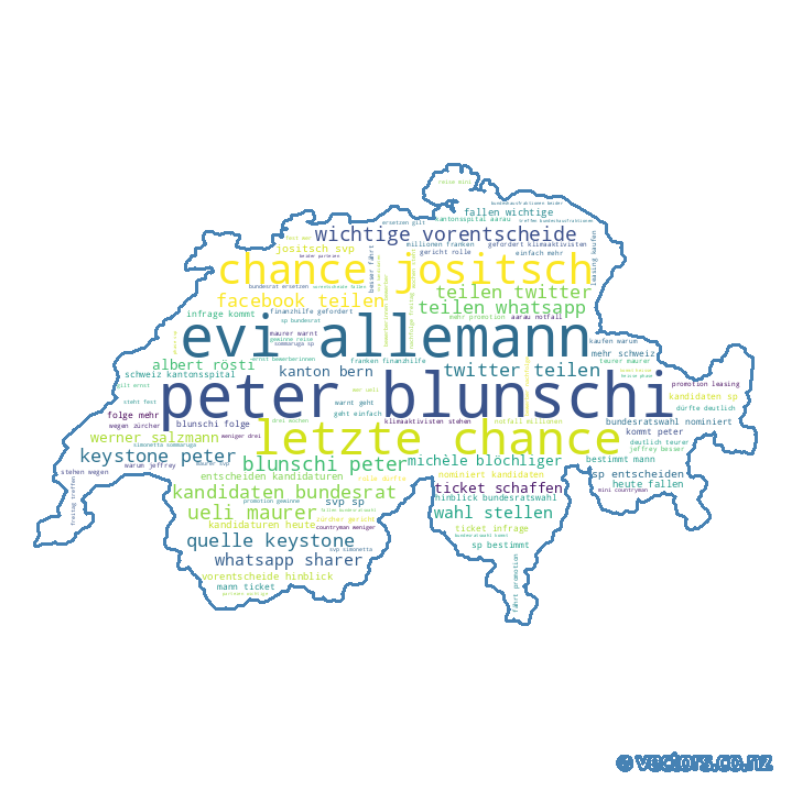

In [1]:
import spacy
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from os import path

text = """Letzte Chance für Jositsch? SVP und SP entscheiden über Kandidaturen
Heute fallen wichtige Vorentscheide im Hinblick auf die Bundesratswahl. Die SVP-Fraktion nominiert ihre Kandidaten und die SP bestimmt, ob ein Mann für das Ticket infrage kommt.
7
18.11.2022, 05:59
Peter Blunschi
Peter Blunschi
Peter Blunschi
Folge mir
Mehr «Schweiz»
Kantonsspital Aarau wird selbst zum Notfall: 240 Millionen Franken Finanzhilfe gefordert
Klimaaktivisten stehen wegen Banken-Blockade vor Zürcher Gericht
Von der Rolle: Das WC-Papier dürfte deutlich teurer werden
Maurer warnt: «Es geht einfach nicht mehr auf»
Promotion
Leasing oder kaufen? Warum Jeffrey mit dem Auto-Abo besser fährt.
Promotion
Gewinne eine 2-wöchige Reise im MINI Countryman

In weniger als drei Wochen steht fest, wer Ueli Maurer (SVP) und Simonetta Sommaruga (SP) im Bundesrat ersetzen wird. Nun gilt es ernst für die Bewerberinnen und Bewerber um die Nachfolge. Am Freitag treffen sich die Bundeshausfraktionen beider Parteien, um wichtige Vorentscheide zu fällen. Die Bundesratswahl kommt in ihre heisse Phase.
SVP
1 / 8
Maurer-Nachfolge: Diese 5 Kandidaten wollen in den Bundesrat
Das Kandidatenkarussell für die Nachfolge von SVP-Bundesrat Ueli Maurer dreht sich seit dessen Rücktrittsankündigung Ende September. Die wichtigsten Namen im Überblick:
quelle: keystone / peter klaunzer
Auf Facebook teilen
Auf Twitter teilen
Whatsapp sharer

Die SVP-Fraktion tagt in Hérémance im Kanton Wallis. Sie dürfte für den Maurer-Sitz ein Zweierticket nominieren und damit der Empfehlung von Findungskommission und Fraktionsvorstand folgen. Auf Namen wollten sich beide Gremien nicht festlegen. Alle fünf Kandidierenden hätten einen eindrücklichen Leistungsausweis und seien wählbar, hiess es.

Zur Wahl stellen sich:

    Michèle Blöchliger, Regierungsrätin (Nidwalden)
    Albert Rösti, Nationalrat (Bern)
    Werner Salzmann, Ständerat (Bern)
    Heinz Tännler, Regierungsrat (Zug)
    Hans-Ueli Vogt, alt Nationalrat (Zürich)

Sie können sich in einem Hearing präsentieren, in alphabetischer Reihenfolge, und erhalten je fünf Minuten Zeit, sich vorzustellen. Anschliessend können ihnen die Fraktionsmitglieder Fragen stellen. Danach wird die Fraktion die Nomination vornehmen. Über den Entscheid wird gemäss einer Mitteilung nicht vor 17.30 Uhr informiert.

Als gesetzt gilt Rösti. Der frühere SVP-Präsident verfügt über starken Rückhalt in der Fraktion und kommt auch bei den anderen Parteien gut an. Um den zweiten Platz auf dem Ticket könnte es zu einem «Hosenlupf» zwischen Tännler und Vogt kommen. Unter Röstis «Getreuen» gibt es angeblich Bestrebungen, den homosexuellen Zürcher zu verhindern.

Solche Spekulationen und Machtspielchen sind Teil fast jeder Bundesratswahl. Sie sind nur bedingt ernst zu nehmen. Albert Rösti jedenfalls ist und bleibt Topfavorit. Werner Salzmann hingegen wird es als zweiter Berner kaum auf das Ticket schaffen. Und Michèle Blöchliger dürfte über ihre schweizerisch-britische Doppelbürgerschaft stolpern.
SP
1 / 6
Sommaruga-Nachfolge: Diese Kandidatinnen und Kandidaten wollen in den Bundesrat
Evi Allemann ist 44, sass bis 2018 im Nationalrat für den Kanton Bern und amtet für diesen nun als Justizdirektorin in der Regierung.
quelle: keystone / peter schneider
Auf Facebook teilen
Auf Twitter teilen
Whatsapp sharer

Bei den Sozialdemokraten, die für die Ersatzwahl weniger Zeit zur Verfügung haben als die SVP, geht es am Freitag noch nicht um Namen. Die Fraktion entscheidet im Bundeshaus vielmehr über die Kriterien, die für eine Kandidatur gelten sollen. Konkret geht es um das von Partei- und Fraktionspräsidium vorgeschlagene Ticket mit zwei Frauen.

Die Ausgrenzung der Männer bei gleichzeitiger Öffnung für Bewerbungen aus allen Landesteilen hat für Diskussionsstoff und Unmut gesorgt. Provoziert fühlt sich vor allem der Zürcher Ständerat Daniel Jositsch, dem schon länger Bundesratsambitionen nachgesagt werden. Er hat trotz der Ausschlusskriterien seine Kandidatur eingereicht.

Die Sitzung am Freitag ist wohl die letzte Chance für Jositsch, es doch auf das Ticket für die Sommaruga-Nachfolge zu schaffen. Sein Solothurner Ratskollege Roberto Zanetti schlägt eine Dreiernominierung vor. Dazu wird es jedoch kaum kommen. Es ist sehr wahrscheinlich, dass die SP-Fraktion trotz der teils heftigen Kritik am reinen Frauenticket festhalten wird.

Zur Wahl stellen sich:

    Evi Allemann, Regierungsrätin (Bern)
    Elisabeth Baume-Schneider, Ständerätin (Jura)
    Eva Herzog, Ständerätin (Basel-Stadt)

Beim heutigen Stand zeichnet sich ein Ticket mit Allemann und Herzog ab, wobei die Baslerin als Favoritin gilt. Baume-Schneider dürfte als Westschweizerin kaum eine Chance haben. Allerdings läuft die Meldefrist bis kommenden Montag um 12 Uhr. Eine kurzfristige weitere Kandidatur ist nicht auszuschliessen, aber wenig wahrscheinlich.
SP-Parteiratschefin nach Jositsch-Zoff: «Werden alle Kandidaturen vorurteilslos prüfen»

Danach wird eine Findungskommission die eingereichten Kandidaturen auf ihre Eignung hin prüfen. Parallel dazu finden vier öffentliche Hearings statt, an denen sich die Kandidierenden den Parteimitgliedern und interessierten Personen vorstellen:

    21. November, 19 Uhr, Neubad, Luzern
    22. November, 19 Uhr, Centre Pluriculturel et social d’Ouchy, Lausanne
    23. November, 19 Uhr, Volkshaus, Zürich
    24. November, 19 Uhr, Kulturhotel Guggenheim, Liestal

Am 25. November gibt der Parteirat der SP Schweiz an einer ausserordentlichen Sitzung eine Empfehlung zuhanden der Bundeshausfraktion ab. Diese wird tags darauf erneut zusammenkommen, um das endgültige Ticket zu nominieren. Am 28. November beginnt die Wintersession mit Hearings in allen Fraktionen, und am 7. Dezember findet die Wahl statt.
Mehr zu den Bundesratswahlen:

    SP Kanton Bern nominiert Evi Allemann als Bundesratskandidatin
    «Wirkt undemokratisch»: Alt Bundesrat Leuenberger kritisiert SP für reines Frauenticket
    Die Grünen machen Ernst mit der Bundesratskandidatur

"""

### vorverarbeiten mit nltk
words = word_tokenize(text)
words_alpha =[word.lower() for word in words if word.isalpha()]
stopwords = stopwords.words('german')
stopwords.append("uhr")
stopwords.append("november")
result = [word for word in words_alpha if word not in stopwords]
text = (" ").join(result)

### Rest mit spacy
#v1
#doc = nlp(text)
#substantive = []
#lemmas = [str(token.lemma_) for token in doc]
#text = (" ").join(lemmas)

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

maske = np.array(Image.open(path.join(d, "maske.png")))

wc = WordCloud(collocation_threshold=1,background_color="white", max_words=2000, mask=maske, contour_width=3, contour_color='steelblue',collocations=True, normalize_plurals=False)
wc.generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [120]:

#v2
#for token in doc:
#    if "NOUN" in token.pos_:
#        substantive.append(str(token))
#text = (" ").join(substantive)
text

'Hinblick Mann Folge Million Franke Finanzhilfe klimaaktivist Gericht Maurer Gewinn Reise Woche Maurer Bewerber Freitag Partei Phase Rücktrittsankündigung Ende September Name Empfehlung Name Wahl Michèle Regierungsrätin Nationalrat Zeit Fraktion Nomination Entscheid Mitteilung Rückhalt Partei Platz Teil Michèle Doppelbürgerschaft Regierung Sozialdemokrat Ersatzwahl Zeit Verfügung Freitag kriterien Kandidatur Fraktionspräsidium Ticket Frau Ausgrenzung Öffnung Unmut Ständerat Kandidatur Sitzung Chance Dreiernominierung Kritik Wahl Regierungsrätin Baslerin favoritin Montag Kandidatur Eignung person Kulturhotel Sitzung Empfehlung Wintersession Dezember Wahl Bundesratskandidatur'

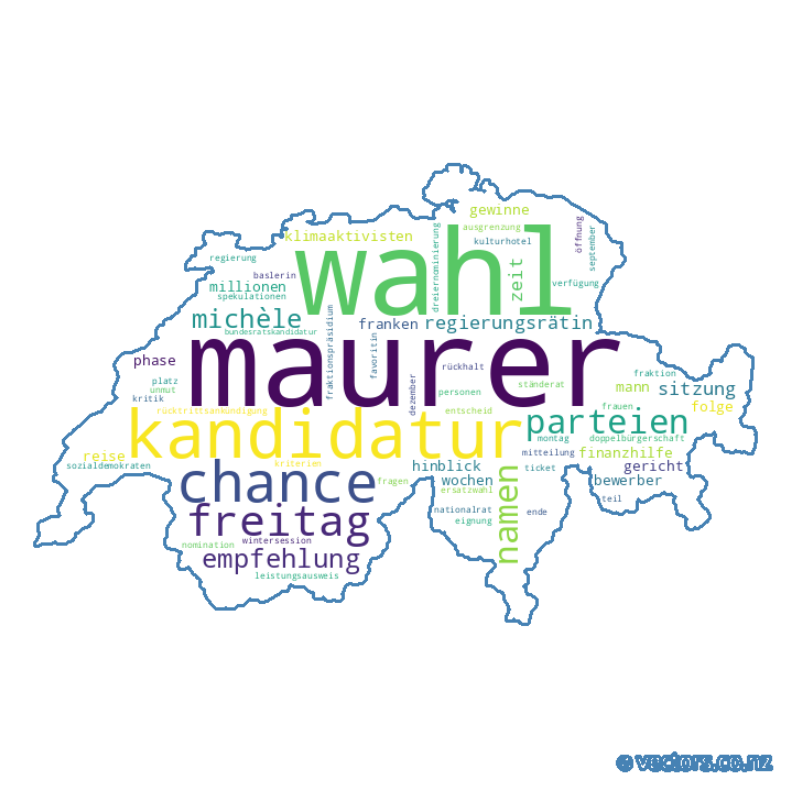

- Wenn man viele files hat und jedes verarbeiten möchte, kann man daraus eine funktion machen.  Wie z.B. hier:

In [67]:
result = []
def process_text(text):
    words = word_tokenize(text)
    words_german =[word.lower() for word in words if word.isalpha()]
    lemma = nltk.WordNetLemmatizer()
    lemmas = [lemma.lemmatize(i) for i in words_german]
    result = [word for word in lemmas if word not in stopwords]
    return result

#for file in files:
#    result.append(process_text(file))